In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train_path = '/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET'

In [ ]:
img_width = 150
img_height = 150

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    subset = 'training',
    seed = 125,
    batch_size = 10,
    validation_split = 0.2
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    subset = 'validation',
    seed = 125,
    validation_split = 0.2
)


category = data_train.class_names
print(category)

Found 1006 files belonging to 10 classes.
Using 805 files for training.
Found 1006 files belonging to 10 classes.
Using 201 files for validation.
['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']


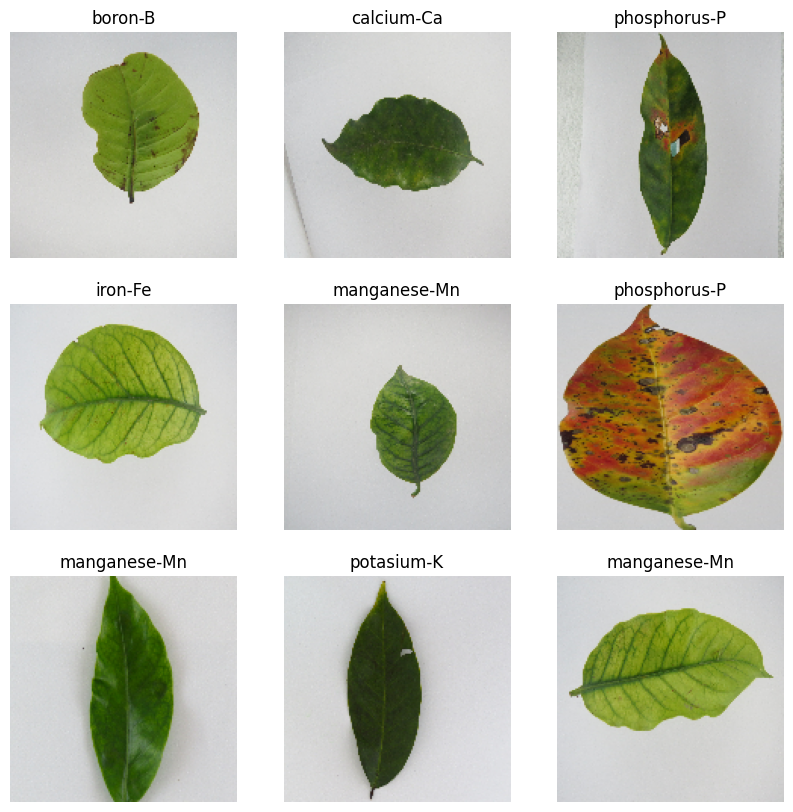

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(category[labels[i]])
        plt.axis('off')

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(category))
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(data_train, validation_data=data_test, epochs=20)

Epoch 1/20
81/81 [==============================] - 262s 3s/step - loss: 2.6436 - accuracy: 0.2745 - val_loss: 1.2806 - val_accuracy: 0.4975
Epoch 2/20
81/81 [==============================] - 62s 716ms/step - loss: 1.7853 - accuracy: 0.3528 - val_loss: 0.9502 - val_accuracy: 0.6667
Epoch 3/20
81/81 [==============================] - 62s 714ms/step - loss: 1.5076 - accuracy: 0.4671 - val_loss: 0.6397 - val_accuracy: 0.7463
Epoch 4/20
81/81 [==============================] - 64s 710ms/step - loss: 1.4610 - accuracy: 0.4857 - val_loss: 0.8010 - val_accuracy: 0.7413
Epoch 5/20
81/81 [==============================] - 62s 701ms/step - loss: 1.2791 - accuracy: 0.5453 - val_loss: 0.7973 - val_accuracy: 0.6915
Epoch 6/20
81/81 [==============================] - 64s 718ms/step - loss: 1.1753 - accuracy: 0.5925 - val_loss: 0.6496 - val_accuracy: 0.7413
Epoch 7/20
81/81 [==============================] - 62s 713ms/step - loss: 1.0829 - accuracy: 0.6224 - val_loss: 0.6187 - val_accuracy: 0.7662
E

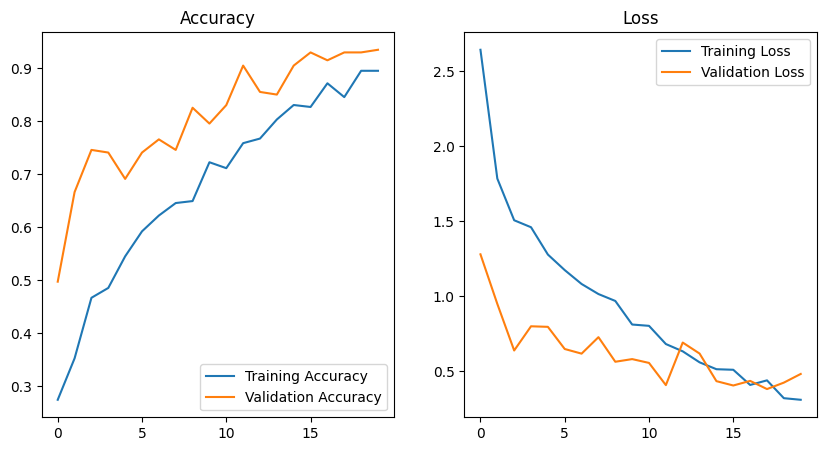

In [ ]:
epochs_range = range(20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.legend()

In [ ]:
image = r"/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET/iron-Fe/Fe (1).JPG"
image = tf.keras.utils.load_img(image, target_size=(150, 150))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_batch)
score = tf.nn.softmax(predict)
print('This is {} with accuracy of {:0.2f}'.format(category[np.argmax(score)], np.max(score)*100))

In [ ]:
model.save('CNN_CoLeaf.keras')